# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
!pip install tomotopy

In [2]:
!pip install little_mallet_wrapper

In [3]:
import tomotopy as tp
import little_mallet_wrapper

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [4]:
# Q2 (code)

# Import Pandas
import pandas as pd

# Load the datasets
sanders_df = pd.read_csv('sanders_tweets.csv')
trump_df = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets
combined_df = pd.concat([sanders_df, trump_df], ignore_index=True)

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('stopwords')

# Define a function to clean tweets
def clean_tweet_text(text):
    # Convert to lowercase
    cleaned_text = text.lower()

    # Remove URLs, user mentions, "realdonaldtrump", and Twitter stopword such as 'rt' and 'amp' 
    cleaned_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump|rt|amp", '', cleaned_text, flags=re.MULTILINE)

    # Remove punctuation and numbers
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    cleaned_text = re.sub(r'\d+', '', cleaned_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(cleaned_text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    # Join the words back into a string
    cleaned_text = ' '.join(filtered_text)

    return cleaned_text

# Apply the function to the dataframe
combined_df['Content'] = combined_df['Content'].apply(clean_tweet_text)

# Create lists
training_data = combined_df['Content'].tolist()
original_texts = combined_df['Content'].tolist()
titles = [f"{row['Username']}-{row['TweetId']}" for _, row in combined_df.iterrows()]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/araniaslama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Check
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [7]:
# Q4 (code)

# Number of topics to return
num_topics = 10
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.22263308671123
Iteration: 10	Log-likelihood: -8.88988600868855
Iteration: 20	Log-likelihood: -8.728092208563535
Iteration: 30	Log-likelihood: -8.642387016875528
Iteration: 40	Log-likelihood: -8.584654507048674
Iteration: 50	Log-likelihood: -8.54896289080915
Iteration: 60	Log-likelihood: -8.525265667547806
Iteration: 70	Log-likelihood: -8.49802485749008
Iteration: 80	Log-likelihood: -8.482410352847383
Iteration: 90	Log-likelihood: -8.47101686930273


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [8]:
# Q5a (code)

# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

democrats border want country people get wall great must security

✨Topic 1✨

great vote total endorsement state military strong complete amendment vets

✨Topic 2✨

people health care must need americans country right change millions

✨Topic 3✨

states federal cou people united law supreme us police state

✨Topic 4✨

president american america trump today day country history women people

✨Topic 5✨

president trump impeachment democrats senate us war house people call

✨Topic 6✨

trump russia fbi caign collusion witch hunt democrats president obama

✨Topic 7✨

great thank president today noh pm white house tonight new

✨Topic 8✨

news fake media biden joe would even like people never

✨Topic 9✨

jobs tax workers us trade billion china pay year economy



In [ ]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

### Q5b Description of the 10 Topics

✨Topic 0✨
Keywords such as "democrats", "border", "country", "wall", and "security" suggest discussions around immigration policies, border security, and possibly debates over building a wall along the US border. 

✨Topic 1✨
This topic, with words such as "vote", "military", "endorsement", "amendment", and "vets", points to discussions about political support, endorsements from various groups or states, and issues related to the military and veterans. It may reflect political campaigns or the importance of these groups in the political arena.

✨Topic 2✨
With "health care", "americans", "country", "right", and "millions", this topic appears to concentrate on healthcare issues, debates over rights to healthcare, and the impact of healthcare policies on the population. It might indicate a focus on the need for change or reform in healthcare systems.

✨Topic 3✨
Keywords like "states", "federal", "law", "supreme", and "police" suggest situations between state and federal powers, law enforcement, and perhaps debates around the Supreme Court or legal rulings. This could encompass discussions about the role of law enforcement and federal agencies within the United States.

✨Topic 4✨
Keywords such as "president", "american", "america", "history", and "women", points to discussions about the presidency, national identity, and possibly significant historical events or contributions of various groups to the country. It reflects on the role of the president in shaping the country's direction.

✨Topic 5✨
With "president", "impeachment", "democrats", "senate", and "house", this topic centers on the political processes around impeachment, the conflict between political parties, and the involvement of legislative bodies. It might refer to a period of heightened political tension.

✨Topic 6✨
Keywords like "trump", "russia", and "fbi" indicate discussions related to investigations, particularly those involving foreign interference in elections, and the political and public reactions to such allegations.

✨Topic 7✨
With "great", "thank", "president", "white house", and "tonight", this topic seems to focus on public addresses, events, and expressions of gratitude, possibly highlighting the president's schedule, public engagements, or acknowledgments.

✨Topic 8✨
This topic, with "news", "fake", "media", "biden", and "like", suggests a discourse on media bias, public perception, and political figures' relationships with the press. It reflects concerns over misinformation and the portrayal of political entities in the media.

✨Topic 9✨
Keywords such as "jobs", "tax", "workers", "trade", and "china" point to discussions on economic policy, trade agreements, taxation, and the impact of these policies on the workforce and trade relations, particularly with countries like China.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [9]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5642718159779906 
Per Topic: [0.4854126155376434, 0.8033915102481842, 0.6340907096862793, 0.4751683473587036, 0.4212010070681572, 0.46357008032500746, 0.6911860525608062, 0.5012086912989616, 0.5748036608099938, 0.5926854848861695]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [ ]:
# Q6 (words)

### Q6

The number of topics I initially used to train the model was 10, and it showed high coherence in one of the topics. When I tried to lower the number of topics to 5 or change to 15, there were no coherence scores higher than 0.6. Thus, I decided to stick with using 10 topics, and here are the results:

High Coherence: Topic 1 (0.803) shows a very high coherence score, suggesting that the words within this topic are highly related and form a cohesive theme. This is an indicator of a well-defined topic.

Moderate to High Coherence: Topics 2, 6, 8, and 9 show moderate to high coherence scores (ranging from approx. 0.592 to 0.691), indicating these topics are reasonably interpretable.

Low to Moderate Coherence: Topics 0, 3, 4, 5, and 7 show lower coherence scores (ranging from approx. 0.421 to 0.501), suggesting these topics may be less clear or contain a mix of less related terms.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [13]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [41]:
# Q7a (code)

#Load topic distributions
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

#Load topic distributions
topic_distributions[32]

[0.10032667,
 0.0038557732,
 0.7010527,
 0.0069218897,
 0.10042307,
 0.008444747,
 0.052835654,
 0.008269863,
 0.0114245955,
 0.0064450013]

In [21]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [33]:
# Display 6 documents for Topic 0
get_top_docs(titles, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

democrats border want country people get wall great must security



---


✨  
**Topic Probability**: 0.960172712802887  
**Document**: @realDonaldTrump-1224548665743892480



✨  
**Topic Probability**: 0.9542662501335144  
**Document**: @realDonaldTrump-1224547020410630144



✨  
**Topic Probability**: 0.9510842561721802  
**Document**: @realDonaldTrump-1107394098506485760



✨  
**Topic Probability**: 0.9510842561721802  
**Document**: @realDonaldTrump-1096099414916169730



✨  
**Topic Probability**: 0.9494358897209167  
**Document**: @realDonaldTrump-1009555147108696064



✨  
**Topic Probability**: 0.9457817673683167  
**Document**: @realDonaldTrump-1137865875304980485



In [34]:
# Display 6 documents for Topic 2
get_top_docs(titles, topic_distributions, topic_index=2, n=6)

### ✨Topic 2✨

people health care must need americans country right change millions



---


✨  
**Topic Probability**: 0.9423680305480957  
**Document**: SenSanders-1260927699020845056



✨  
**Topic Probability**: 0.9423680305480957  
**Document**: SenSanders-1110927244241891328



✨  
**Topic Probability**: 0.9423680305480957  
**Document**: SenSanders-1018901755927650304



✨  
**Topic Probability**: 0.9400323629379272  
**Document**: SenSanders-1234229745857875968



✨  
**Topic Probability**: 0.937499463558197  
**Document**: SenSanders-1031978759359025152



✨  
**Topic Probability**: 0.9347431063652039  
**Document**: SenSanders-1156915056539516928



In [36]:
# Display 6 documents for Topic 8
get_top_docs(titles, topic_distributions, topic_index=8, n=6)

### ✨Topic 8✨

news fake media biden joe would even like people never



---


✨  
**Topic Probability**: 0.9665505886077881  
**Document**: @realDonaldTrump-1207515297969631232



✨  
**Topic Probability**: 0.9547749757766724  
**Document**: @realDonaldTrump-1207663213619400704



✨  
**Topic Probability**: 0.9534653425216675  
**Document**: @realDonaldTrump-1054451956608049152



✨  
**Topic Probability**: 0.9518972039222717  
**Document**: @realDonaldTrump-1033339636343549952



✨  
**Topic Probability**: 0.9502196907997131  
**Document**: @realDonaldTrump-990049088375836672



✨  
**Topic Probability**: 0.9502196907997131  
**Document**: @realDonaldTrump-1257850156000698369



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
# Q7b (words)

### Q7b

From the results above, it's evident that certain topics are dominated by tweets from a specific politician, as observed in the top 6 tweets of Topic 0 and Topic 8, which are all by Trump, and the top tweets of Topic 2, which are all by Sanders. Here are my interpretations: 

##### Topic 0 
The keywords "border", "country", "wall", and "security" show a strong relation to Trump's project called "The Wall", which is an expansion of the Mexico–United States border.


##### Topic 2 
Looking at the keywords of Topic 2, which are "health", "care", "americans", "right", and "millions", I think it suggests that Topic 2 includes top tweets by Bernie Sanders, known for his vocal advocacy for transforming the United States healthcare system with a program he introduced called "Medicare for All."


##### Topic 8
This topic, which has keywords such as "fake", "news", and "media", are highly related to Trump, as he has declared the media to be the enemy of the American people.  

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [11]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

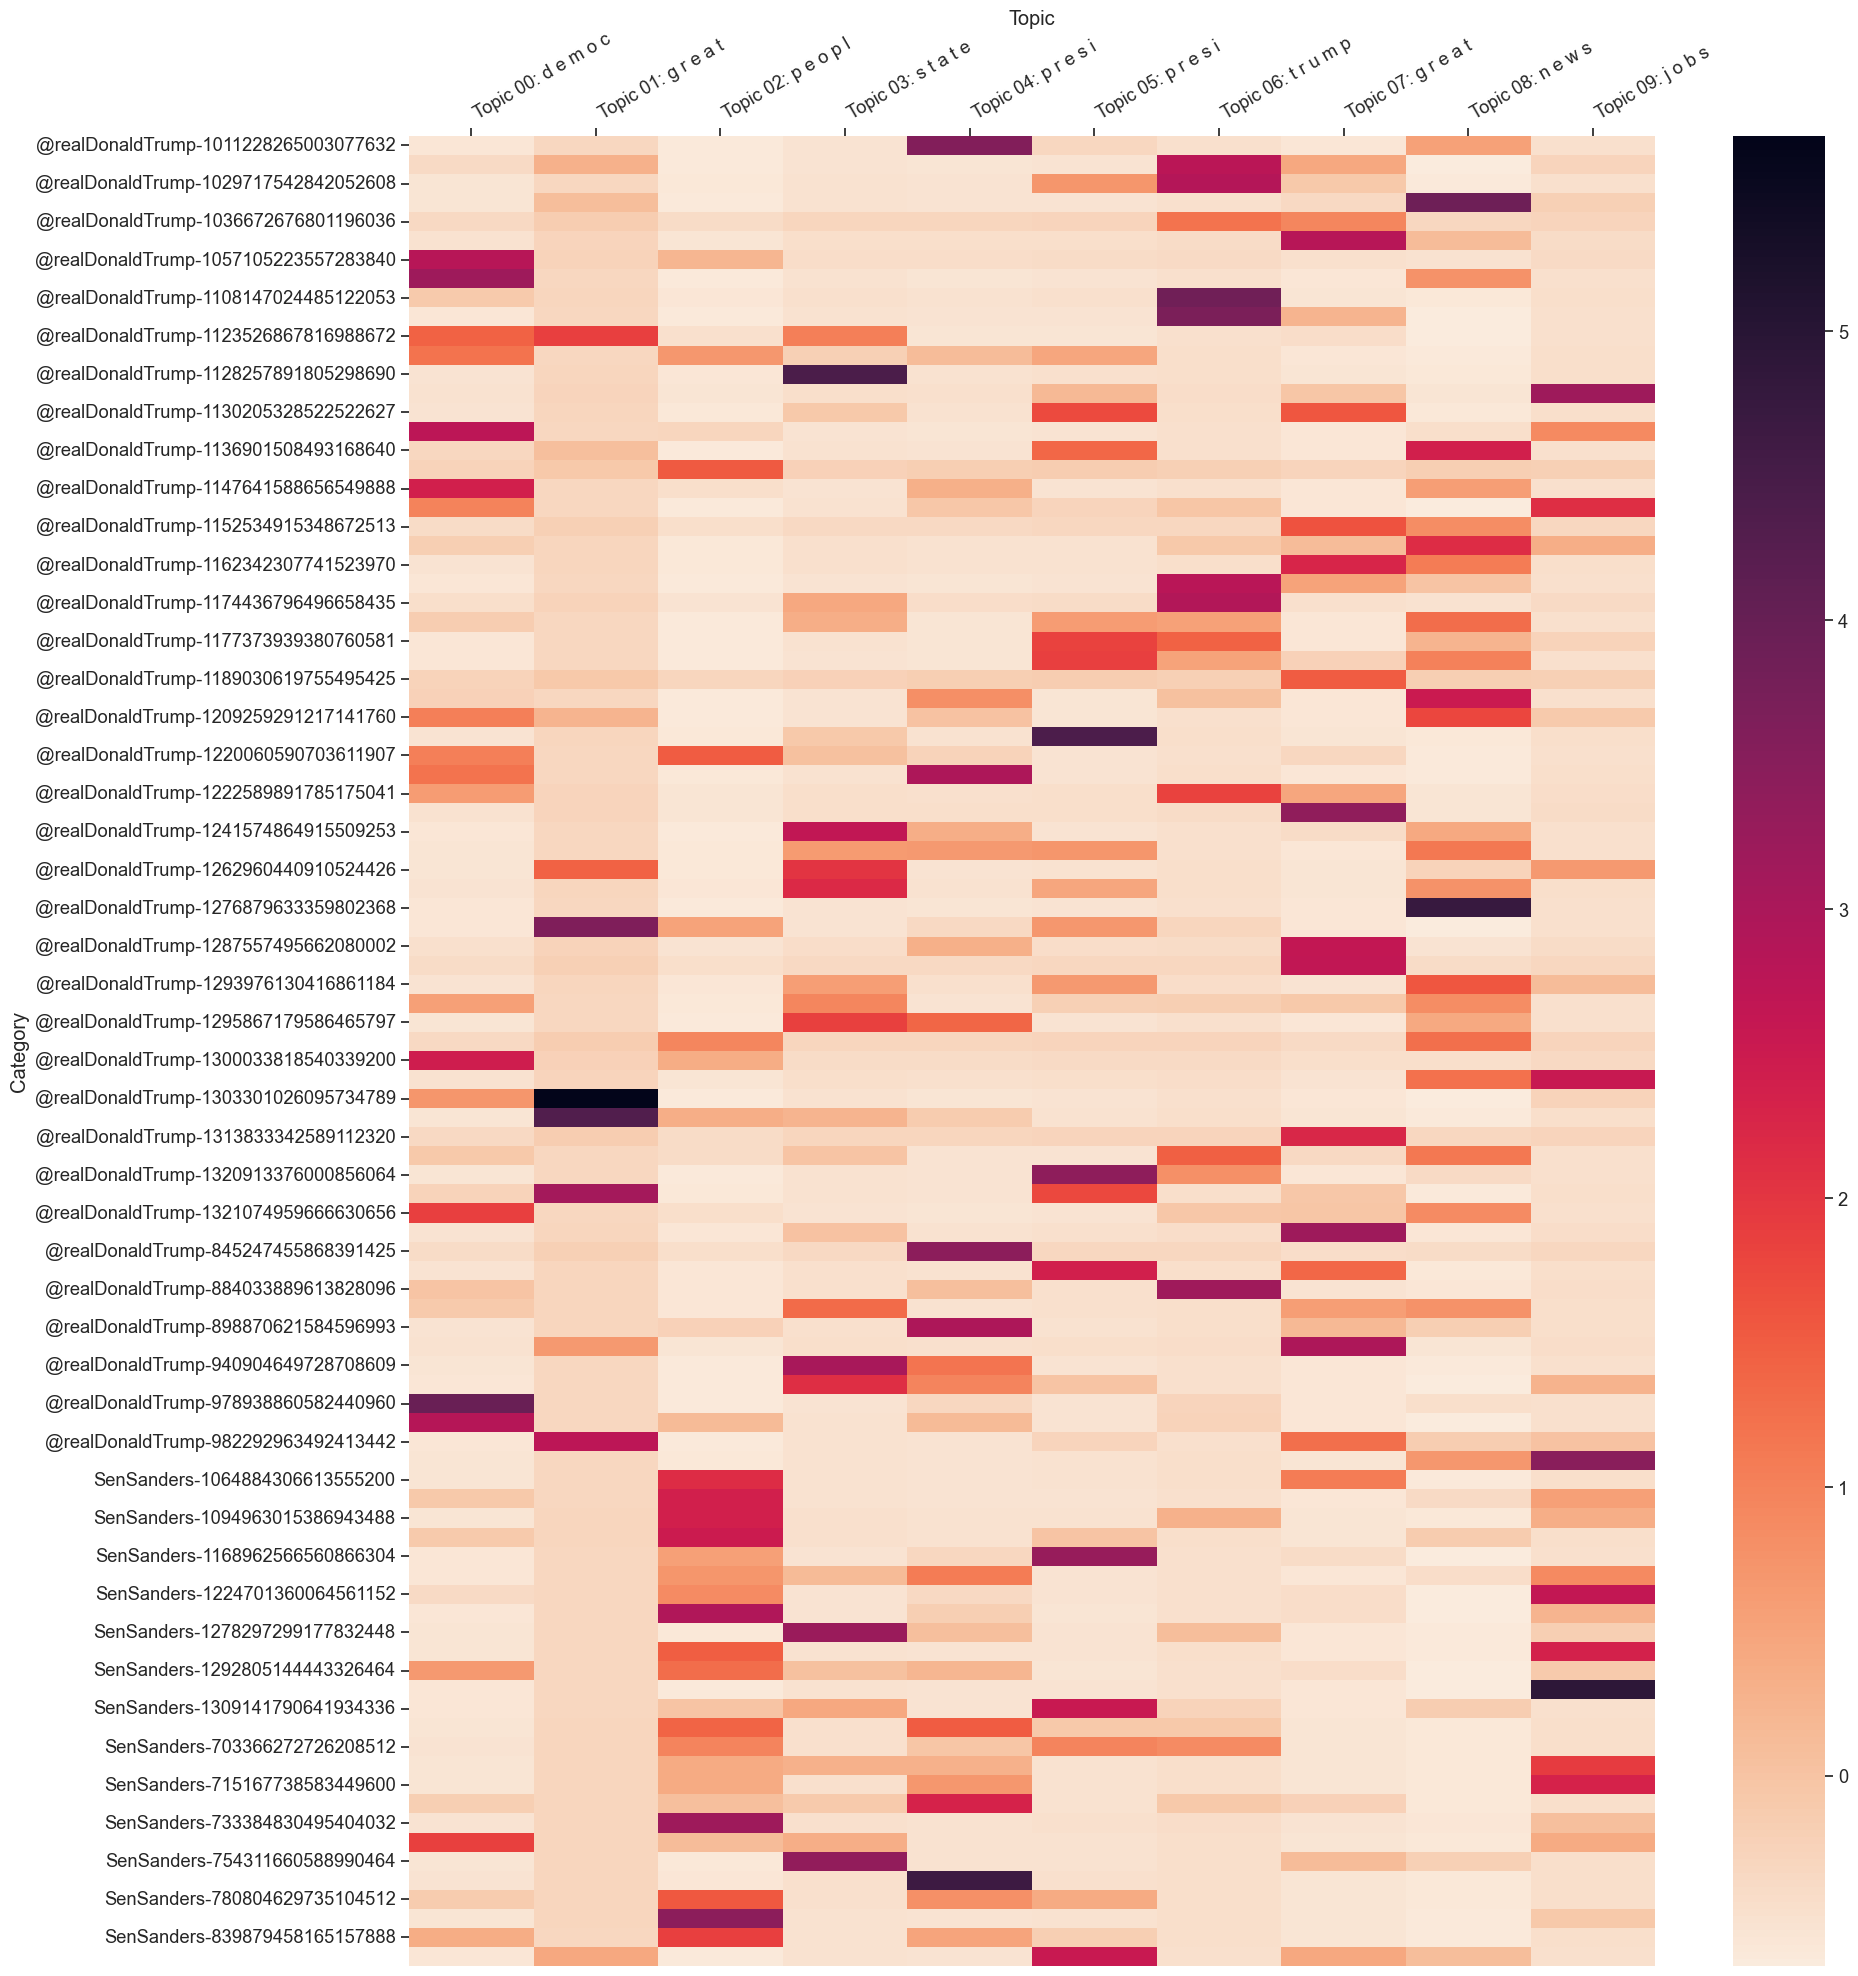

In [12]:
# Q8 (code)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

#Load topic distributions
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=(20,20)):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()
    
plot_categories_by_topics_heatmap(titles, topic_distributions, topics, target_labels=target_labels, dim=(20, 20))

# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)

## Q9

The range of colors, from darker to lighter, indicates the strength of a topic's relevance in a tweet. The darker the color, the higher the probability that the topic is relevant to the tweet. Therefore, based on the heatmap, I can see patterns in the probability distributions of topics for each politician. For example, Topic 02 has more occurrences of darker colors in Sanders' tweets, which means this topic is more likely to appear in his tweets. On the other hand, for Trump, Topic 08 is more likely to be relevant, as indicated by the frequency of darker colors.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [ ]:
# X2 (code)


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)